In [18]:
from sklearn.datasets import load_digits
import numpy as np
digitsData = load_digits()
print(digitsData)
X = digitsData.data
Y = digitsData.target
print(X[:5])
print(Y[:5])
print(X.shape)
print(Y.shape)
Y=np.expand_dims(Y,1)
data=np.append(X,Y,1)
print(data.shape)
print(data[:5])

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]]), 'target': array([0, 1, 2, ..., 8, 9, 8]), 'frame': None, 'feature_names': ['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', '

In [19]:
temp= data[98:102]
print(temp)
np.random.seed(111)
np.random.shuffle(data)

[[ 0.  2. 15. 16. 16. 13.  2.  0.  0.  1. 10.  8. 14. 16.  8.  0.  0.  0.
   0.  0. 16. 15.  1.  0.  0.  0.  0.  0. 16.  8.  0.  0.  0.  0.  0.  0.
  14. 14.  0.  0.  0.  0.  0.  0. 11. 16.  1.  0.  0.  2. 14. 13. 16. 16.
   3.  0.  0.  2. 15. 16. 14.  5.  0.  0.  3.]
 [ 0.  0.  1. 15. 13.  0.  0.  0.  0.  0.  1. 16. 16.  5.  0.  0.  0.  0.
   7. 16. 16.  0.  0.  0.  0.  0. 13. 16. 13.  0.  0.  0.  0.  7. 16. 16.
  13.  0.  0.  0.  0.  1. 11. 16. 13.  0.  0.  0.  0.  0.  2. 16. 16.  0.
   0.  0.  0.  0.  1. 14. 16.  3.  0.  0.  1.]
 [ 0.  0.  0.  2. 13.  0.  0.  0.  0.  0.  0.  8. 15.  0.  0.  0.  0.  0.
   5. 16.  5.  2.  0.  0.  0.  0. 15. 12.  1. 16.  4.  0.  0.  4. 16.  2.
   9. 16.  8.  0.  0.  0. 10. 14. 16. 16.  4.  0.  0.  0.  0.  0. 13.  8.
   0.  0.  0.  0.  0.  0. 13.  6.  0.  0.  4.]
 [ 0.  0.  1. 12.  5.  0.  0.  0.  0.  0.  9. 16. 14.  3.  0.  0.  0.  2.
  16. 14. 11. 13.  0.  0.  0.  2. 16. 10.  0. 14.  4.  0.  0.  4. 16.  0.
   0. 12.  4.  0.  0.  4. 16.  3.  0. 11. 10.

In [20]:
total_sample=len(data)
train=data[:int(total_sample*0.7)]
dev=data[int(total_sample*0.7):int(total_sample*0.85)]
test=data[int(total_sample*0.85):]
print(test)

[[ 0.  6. 16. ...  0.  0.  5.]
 [ 0.  1.  8. ...  0.  0.  5.]
 [ 0.  1. 15. ... 16.  2.  2.]
 ...
 [ 0.  0.  2. ...  0.  0.  7.]
 [ 0.  0.  4. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  4.]]


In [21]:
def data_leaking_check(data1,data2):
  data_leaking =False
  for d1 in data1:
    for d2 in data2:
      if(np.array_equal(d1,d2)):
        data_leaking=True
        print("find same sample")
        print(d1)
  if (not data_leaking):
    print("no data leaking")

In [22]:
data_leaking_check(train,test)

no data leaking


In [23]:
data_leaking_check(train,dev)

no data leaking


In [24]:
def get_features_and_lables(data):
 features=data[:, :-1]
 labels = data[:,-1]
 return features, labels

In [25]:
train_x, train_y = get_features_and_lables(train)
dev_x, dev_y = get_features_and_lables(dev)
test_x, test_y = get_features_and_lables(test)

In [26]:
def euclidean_distance(row1, row2):
  distance =0.0
  for i in range(len(row1)):
    distance += (row1[i]-row2[i])**2
  return np.sqrt(distance)

In [27]:
euclidean_distance(train_x[1],train_x[1])

0.0

In [28]:
euclidean_distance(train_x[1],train_x[10])

41.66533331199932

In [29]:
def get_neighbors(train_x, train_y, test_row, num_neighbours):
 distances = []
#get all distances
 for index in range(len(train_x)):
   train_row= train_x[index]
   train_label= train_y[index]
   dist=euclidean_distance(train_row, test_row)
   distances.append((train_row,train_label,dist))
  #print distances
  #sort the distances list
 distances.sort(key=lambda i:i[2])
 #print distances
 #get the k nearest neighbors and return
 output_neighbors =[]
 output_labels=[]
 output_distances=[]

 for index in range(num_neighbours):
  output_neighbors.append(distances[index][0])
  output_labels.append(distances[index][1])
  output_distances.append(distances[index][2])
 return output_neighbors,output_labels,output_distances
get_neighbors(train_x,train_y,dev_x[0],5)



([array([ 0.,  0.,  2., 14., 13.,  0.,  0.,  0.,  0.,  0., 10., 15., 15.,
          8.,  0.,  0.,  0.,  2., 16.,  7.,  4., 15.,  0.,  0.,  0.,  4.,
         16.,  4.,  0., 13.,  7.,  0.,  0.,  4., 16.,  1.,  0., 10.,  8.,
          0.,  0.,  4., 16.,  5.,  1., 12., 11.,  0.,  0.,  1., 15., 14.,
         13., 16.,  3.,  0.,  0.,  0.,  3., 12., 13.,  5.,  0.,  0.]),
  array([ 0.,  0.,  2., 14.,  9.,  1.,  0.,  0.,  0.,  1., 12., 12., 11.,
          8.,  0.,  0.,  0.,  4., 14.,  1.,  0., 13.,  3.,  0.,  0.,  8.,
         13.,  0.,  0., 10.,  6.,  0.,  0.,  5., 16.,  1.,  0.,  8.,  9.,
          0.,  0.,  0., 16.,  0.,  0., 11.,  9.,  0.,  0.,  0., 13., 11.,
         10., 15.,  4.,  0.,  0.,  0.,  3., 15., 16.,  5.,  0.,  0.]),
  array([ 0.,  0.,  2., 15., 10.,  1.,  0.,  0.,  0.,  2., 13., 12., 14.,
          9.,  0.,  0.,  0.,  6., 16.,  1.,  1., 14.,  2.,  0.,  0.,  8.,
         16.,  0.,  0., 10.,  5.,  0.,  0.,  8., 14.,  2.,  0.,  8.,  8.,
          0.,  0.,  6., 14.,  0.,  0.,  8., 

In [30]:
def prediction_classification(train_x,train_y,train_row, num_neighbours):
  output_neighbors,output_labels,output_distances = get_neighbors(train_x,train_y,train_row,num_neighbours)
  label_cnt = np.bincount(output_labels)
  prediction = np.argmax(label_cnt)
  return prediction
prediction_classification(train_x, train_y, dev_x[1], 5)

2

In [31]:
k = 5
pred_labels = []
for dev_data in dev_x:
  pred = prediction_classification (train_x, train_y, dev_data,k)
  pred_labels.append (pred)

pred_labels

print(dev_y)
print(pred_labels)
#data_leaking_check(dev_y,pred_labels)

[0. 2. 9. 4. 8. 9. 5. 4. 2. 1. 1. 2. 1. 3. 6. 7. 7. 5. 3. 3. 0. 4. 4. 7.
 6. 1. 2. 9. 4. 3. 5. 0. 9. 0. 1. 4. 0. 1. 7. 4. 7. 0. 9. 7. 4. 9. 6. 0.
 7. 9. 5. 1. 5. 1. 8. 2. 9. 3. 0. 3. 4. 0. 4. 1. 9. 6. 4. 2. 6. 8. 0. 9.
 3. 1. 4. 6. 3. 8. 0. 6. 8. 6. 4. 6. 9. 1. 6. 6. 5. 6. 3. 9. 4. 0. 9. 4.
 2. 5. 2. 9. 6. 7. 2. 9. 2. 4. 3. 5. 0. 2. 0. 4. 5. 1. 5. 9. 4. 3. 0. 9.
 9. 3. 0. 6. 1. 6. 1. 9. 6. 5. 3. 8. 6. 7. 0. 2. 7. 4. 0. 3. 5. 7. 4. 5.
 4. 5. 6. 3. 2. 0. 2. 0. 4. 5. 8. 1. 0. 2. 3. 7. 4. 1. 8. 8. 1. 8. 5. 4.
 8. 9. 4. 2. 7. 3. 1. 0. 3. 8. 0. 4. 2. 1. 0. 8. 2. 3. 5. 2. 9. 9. 8. 3.
 3. 4. 2. 4. 4. 5. 0. 4. 5. 5. 6. 6. 4. 1. 3. 4. 5. 8. 0. 6. 2. 1. 1. 0.
 2. 7. 2. 8. 7. 4. 1. 6. 8. 2. 7. 7. 9. 8. 0. 8. 9. 4. 8. 8. 6. 4. 0. 1.
 7. 9. 8. 3. 2. 9. 0. 5. 0. 0. 7. 1. 1. 9. 3. 0. 9. 8. 3. 9. 3. 2. 0. 0.
 7. 2. 4. 7. 7. 1.]
[0, 2, 9, 4, 8, 9, 5, 4, 2, 1, 1, 2, 1, 3, 6, 7, 7, 5, 3, 3, 0, 4, 4, 7, 6, 1, 2, 9, 4, 3, 5, 0, 9, 0, 1, 4, 0, 1, 7, 4, 7, 0, 9, 7, 4, 9, 6, 0, 7, 9, 5, 1, 5, 1, 8, 2, 8, 3, 0,

In [32]:
from sklearn.metrics import accuracy_score
acc = accuracy_score (dev_y, pred_labels)
print(acc)

0.9814814814814815


In [33]:
k_list = list(range(1,70,3))
print(k_list)
performance = []
for k in k_list:
  pred_labels = []
  for dev_data in dev_x:
    pred = prediction_classification(train_x, train_y, dev_data, k)
    pred_labels.append(pred)
  acc = accuracy_score(dev_y, pred_labels)
  performance.append(acc)
performance

[1, 4, 7, 10, 13, 16, 19, 22, 25, 28, 31, 34, 37, 40, 43, 46, 49, 52, 55, 58, 61, 64, 67]


[0.9851851851851852,
 0.9814814814814815,
 0.9740740740740741,
 0.9740740740740741,
 0.9814814814814815,
 0.9666666666666667,
 0.9703703703703703,
 0.9666666666666667,
 0.9629629629629629,
 0.9592592592592593,
 0.9518518518518518,
 0.9518518518518518,
 0.9481481481481482,
 0.9481481481481482,
 0.9518518518518518,
 0.9481481481481482,
 0.9407407407407408,
 0.937037037037037,
 0.9333333333333333,
 0.9333333333333333,
 0.9296296296296296,
 0.9407407407407408,
 0.9296296296296296]

Text(0.5, 1.0, 'Performance on Dev Set')

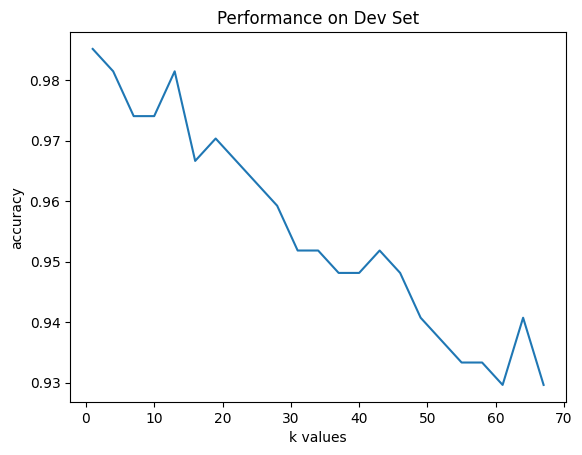

In [34]:
import matplotlib.pyplot as plt
plt.plot (k_list, performance)
plt.xlabel("k values")
plt.ylabel("accuracy")
plt.title("Performance on Dev Set")

Text(0.5, 1.0, 'Performance on Dev Set')

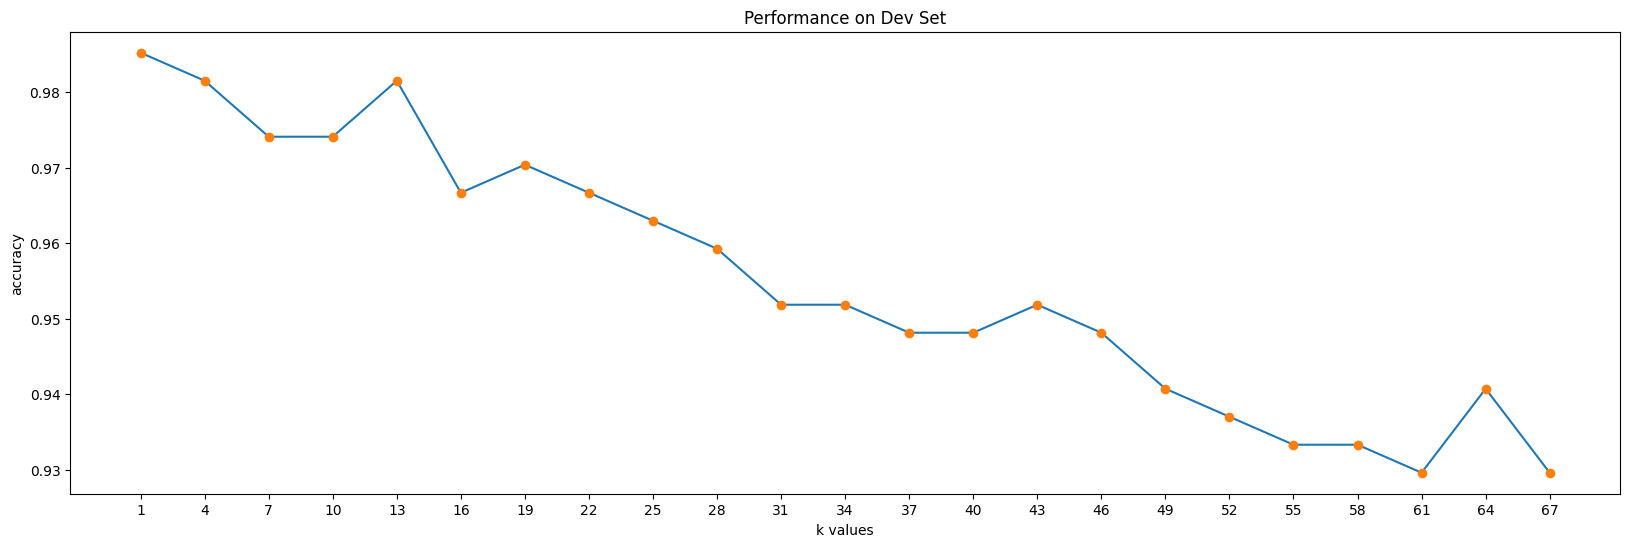

In [35]:
import matplotlib.pyplot as plt
plt.figure(figsize = (20,6))
plt.plot(k_list, performance)
plt.plot(k_list, performance, 'o')
plt.xticks (k_list)
plt.xlabel("k values")
plt.ylabel("accuracy")
plt.title("Performance on Dev Set")

In [36]:
k_list = list(range(1,70,3))
print(k_list)
performance = []
for k in k_list:
  pred_labels = []
  for test_data in test_x:
    pred = prediction_classification(train_x, train_y, test_data, k)
    pred_labels.append(pred)
  acc = accuracy_score(test_y, pred_labels)
  performance.append(acc)
performance

[1, 4, 7, 10, 13, 16, 19, 22, 25, 28, 31, 34, 37, 40, 43, 46, 49, 52, 55, 58, 61, 64, 67]


[0.9814814814814815,
 0.9814814814814815,
 0.9777777777777777,
 0.9814814814814815,
 0.9777777777777777,
 0.9777777777777777,
 0.9703703703703703,
 0.9740740740740741,
 0.9629629629629629,
 0.9592592592592593,
 0.9518518518518518,
 0.9555555555555556,
 0.9407407407407408,
 0.9407407407407408,
 0.937037037037037,
 0.9296296296296296,
 0.9222222222222223,
 0.9185185185185185,
 0.9185185185185185,
 0.9185185185185185,
 0.9222222222222223,
 0.9185185185185185,
 0.9148148148148149]

Text(0.5, 1.0, 'Performance on Test Set')

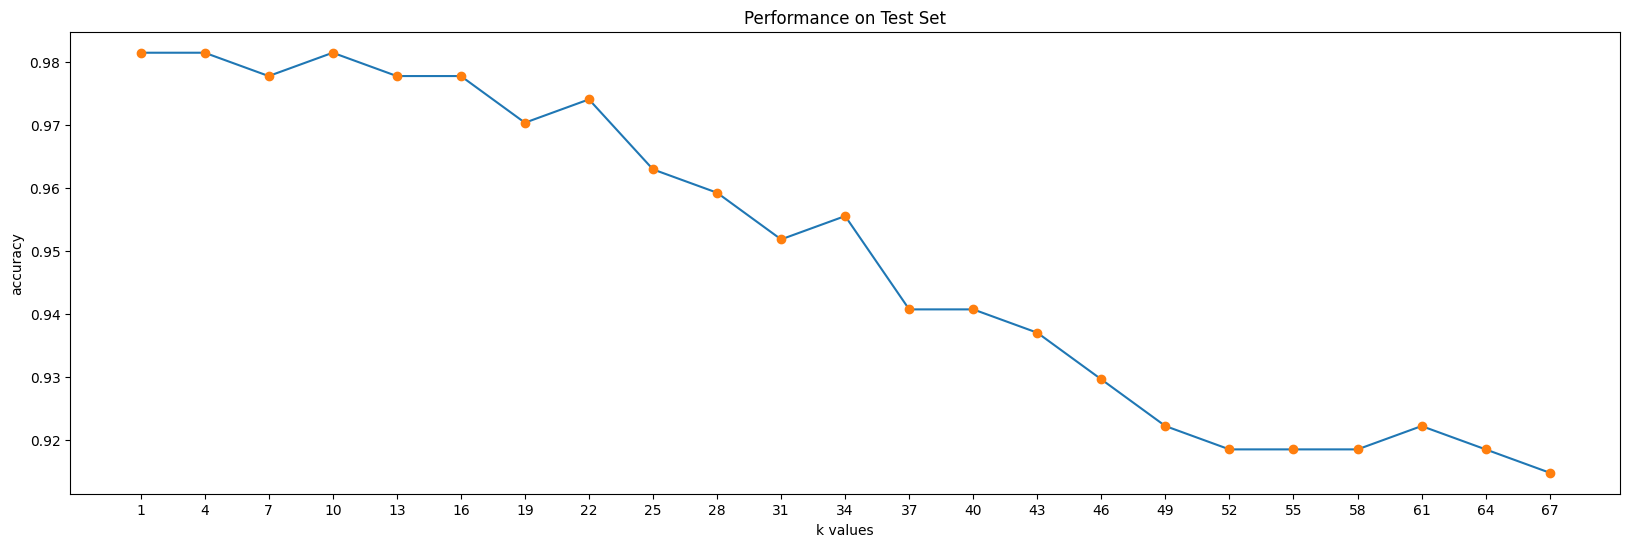

In [37]:
import matplotlib.pyplot as plt
plt.figure(figsize = (20,6))
plt.plot(k_list, performance)
plt.plot(k_list, performance, 'o')
plt.xticks (k_list)
plt.xlabel("k values")
plt.ylabel("accuracy")
plt.title("Performance on Test Set")

In [38]:
def get_neighbors(train_x, train_y, test_row, num_neighbours):
 distances = []
#get all distances
 for index in range(len(train_x)):
   train_row= train_x[index]
   train_label= train_y[index]
   dist=euclidean_distance(train_row, test_row)
   distances.append((train_row,train_label,dist))
  #print distances
  #sort the distances list
 distances.sort(key=lambda i:i[2])
 #print distances
 #get the k nearest neighbors and return
 output_neighbors =[]
 output_labels=[]
 output_distances=[]

 for index in range(num_neighbours):
  output_neighbors.append(distances[index][0])
  output_labels.append(distances[index][1])
  output_distances.append(distances[index][2])
 return output_neighbors,output_labels,output_distances
get_neighbors(train_x,train_y,test_x[0],5)

([array([ 0.,  1., 15., 16., 16., 16.,  5.,  0.,  0.,  7., 16., 16., 12.,
          9.,  1.,  0.,  0., 13., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  5.,
         16., 11.,  0.,  0.,  0.,  0.,  0.,  0., 10., 16.,  6.,  0.,  0.,
          0.,  0.,  0.,  1., 15., 11.,  0.,  0.,  0.,  0.,  1.,  4., 14.,
         12.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.]),
  array([ 0.,  4., 16., 16., 16., 16.,  5.,  0.,  0., 11., 16.,  8.,  5.,
          8.,  3.,  0.,  0., 10., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  3.,
         16.,  6.,  0.,  0.,  0.,  0.,  0.,  0., 16.,  9.,  0.,  0.,  0.,
          0.,  0.,  0., 12., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  6., 16.,
         11.,  0.,  0.,  0.,  0.,  4., 16., 12.,  1.,  0.,  0.,  0.]),
  array([ 0.,  2., 12., 13., 16., 16.,  4.,  0.,  0., 11., 16., 13.,  7.,
          4.,  1.,  0.,  0., 13., 14.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
         15., 12.,  0.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  3.,  0.,  0.,
          0.,  0.,  0.,  0., 13.,  7.,  0., 

In [39]:
def prediction_classification(train_x,train_y,train_row, num_neighbours):
  output_neighbors,output_labels,output_distances = get_neighbors(train_x,train_y,train_row,num_neighbours)
  label_cnt = np.bincount(output_labels)
  prediction = np.argmax(label_cnt)
  return prediction
prediction_classification(train_x, train_y, test_x[1], 5)

5

In [40]:
k = 5
pred_labels = []
for test_data in test_x:
  pred = prediction_classification (train_x, train_y, test_data,k)
  pred_labels.append (pred)

pred_labels

print(test_y)
print(pred_labels)

[5. 5. 2. 9. 0. 2. 3. 7. 7. 5. 7. 3. 4. 9. 3. 0. 5. 0. 9. 2. 2. 0. 6. 7.
 2. 4. 7. 2. 8. 4. 1. 5. 9. 0. 5. 2. 6. 8. 8. 6. 3. 4. 1. 6. 2. 5. 8. 6.
 3. 2. 3. 8. 8. 8. 5. 1. 2. 2. 7. 6. 8. 5. 9. 6. 9. 6. 3. 6. 8. 4. 7. 9.
 4. 4. 2. 3. 9. 4. 6. 6. 5. 5. 5. 8. 8. 0. 1. 0. 3. 9. 2. 2. 6. 9. 5. 3.
 3. 0. 2. 6. 1. 4. 6. 8. 9. 6. 4. 8. 0. 9. 5. 5. 4. 3. 2. 4. 4. 1. 9. 4.
 0. 6. 2. 7. 9. 2. 9. 0. 3. 2. 6. 9. 9. 2. 8. 1. 5. 5. 2. 6. 2. 2. 9. 0.
 4. 3. 8. 6. 3. 1. 4. 1. 8. 4. 5. 1. 4. 9. 7. 5. 1. 0. 4. 4. 8. 2. 6. 9.
 5. 5. 1. 9. 1. 7. 2. 0. 1. 4. 1. 9. 9. 3. 3. 8. 8. 2. 3. 1. 4. 0. 5. 8.
 0. 9. 2. 0. 3. 5. 3. 9. 7. 8. 0. 4. 8. 7. 1. 9. 7. 7. 2. 7. 7. 0. 7. 1.
 4. 3. 8. 2. 1. 3. 5. 6. 5. 5. 7. 8. 7. 7. 9. 9. 4. 3. 4. 4. 0. 0. 5. 9.
 6. 4. 0. 9. 2. 0. 1. 1. 9. 6. 1. 6. 5. 7. 1. 6. 6. 3. 5. 2. 2. 6. 5. 7.
 3. 5. 2. 7. 0. 4.]
[5, 5, 2, 9, 0, 2, 3, 7, 7, 5, 7, 3, 4, 3, 3, 0, 5, 0, 9, 2, 2, 0, 6, 7, 2, 4, 7, 2, 1, 4, 1, 5, 9, 0, 5, 2, 6, 8, 8, 6, 3, 4, 1, 6, 2, 5, 8, 6, 3, 2, 3, 8, 8, 8, 5, 1, 2, 2, 7,

In [41]:
from sklearn.metrics import accuracy_score
acc = accuracy_score (test_y, pred_labels)
print(acc)

0.9814814814814815


In [42]:
k_list = list(range(1,80,3))
print(k_list)
performance = []
for k in k_list:
  pred_labels = []
  for test_data in test_x:
    pred = prediction_classification(train_x, train_y, test_data, k)
    pred_labels.append(pred)
  acc = accuracy_score(test_y, pred_labels)
  performance.append(acc)
performance

[1, 4, 7, 10, 13, 16, 19, 22, 25, 28, 31, 34, 37, 40, 43, 46, 49, 52, 55, 58, 61, 64, 67, 70, 73, 76, 79]


[0.9814814814814815,
 0.9814814814814815,
 0.9777777777777777,
 0.9814814814814815,
 0.9777777777777777,
 0.9777777777777777,
 0.9703703703703703,
 0.9740740740740741,
 0.9629629629629629,
 0.9592592592592593,
 0.9518518518518518,
 0.9555555555555556,
 0.9407407407407408,
 0.9407407407407408,
 0.937037037037037,
 0.9296296296296296,
 0.9222222222222223,
 0.9185185185185185,
 0.9185185185185185,
 0.9185185185185185,
 0.9222222222222223,
 0.9185185185185185,
 0.9148148148148149,
 0.9148148148148149,
 0.9111111111111111,
 0.9111111111111111,
 0.9074074074074074]

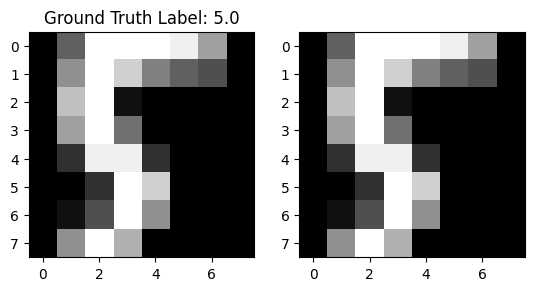

<ipython-input-43-991b4a7d9f2b>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


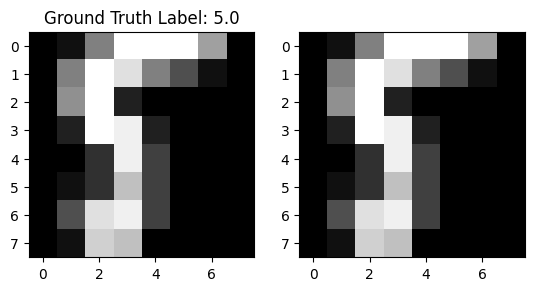

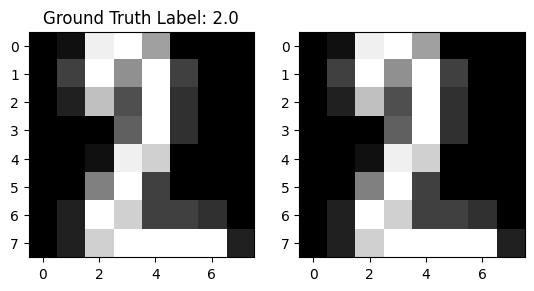

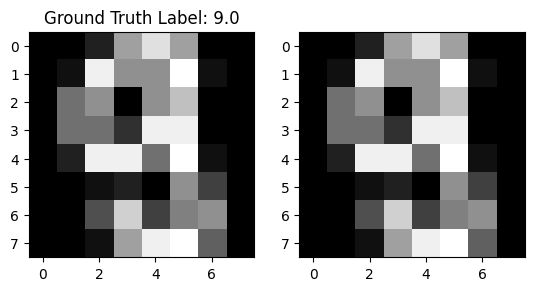

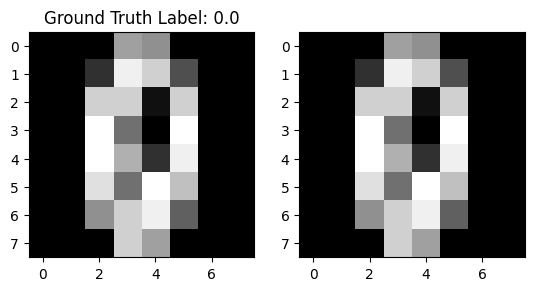

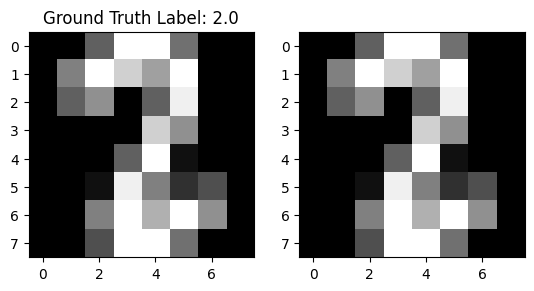

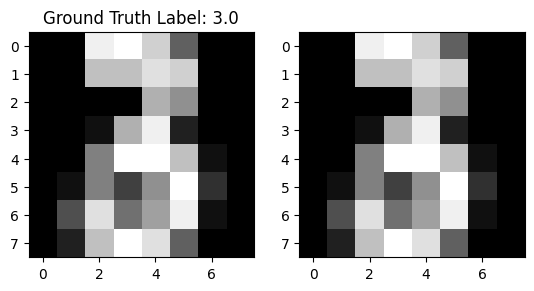

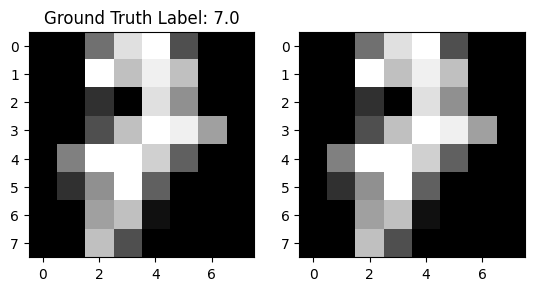

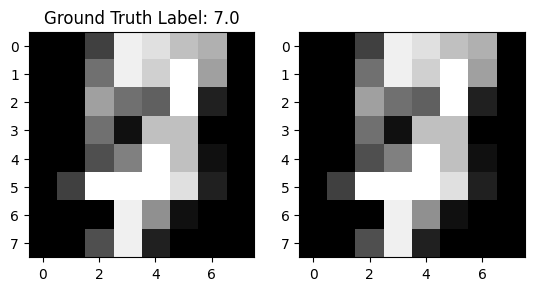

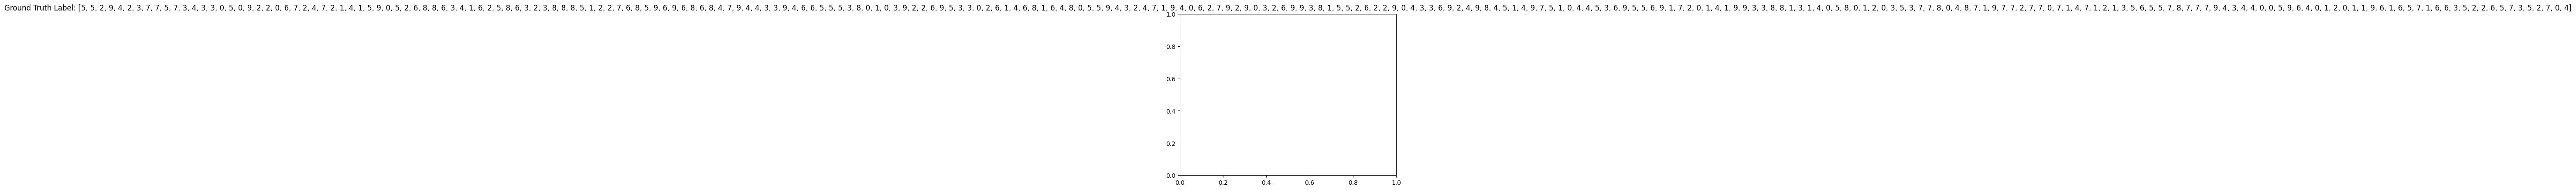

In [43]:
count = 0
for x_test_datum, y_test_datum in zip(test_x, test_y):
  count+= 1
  if count < 10:
    plt.subplot(1,2,1)
    plt.imshow(x_test_datum.reshape(8,8), cmap='gray')
    plt.title("Ground Truth Label: {}".format(y_test_datum))
    plt.subplot(1,2,2)
    plt.imshow(x_test_datum.reshape(8,8), cmap='gray')
    plt.show()
    plt.title("Ground Truth Label: {}".format(pred_labels))

Text(0.5, 1.0, 'Performance on Test Set')

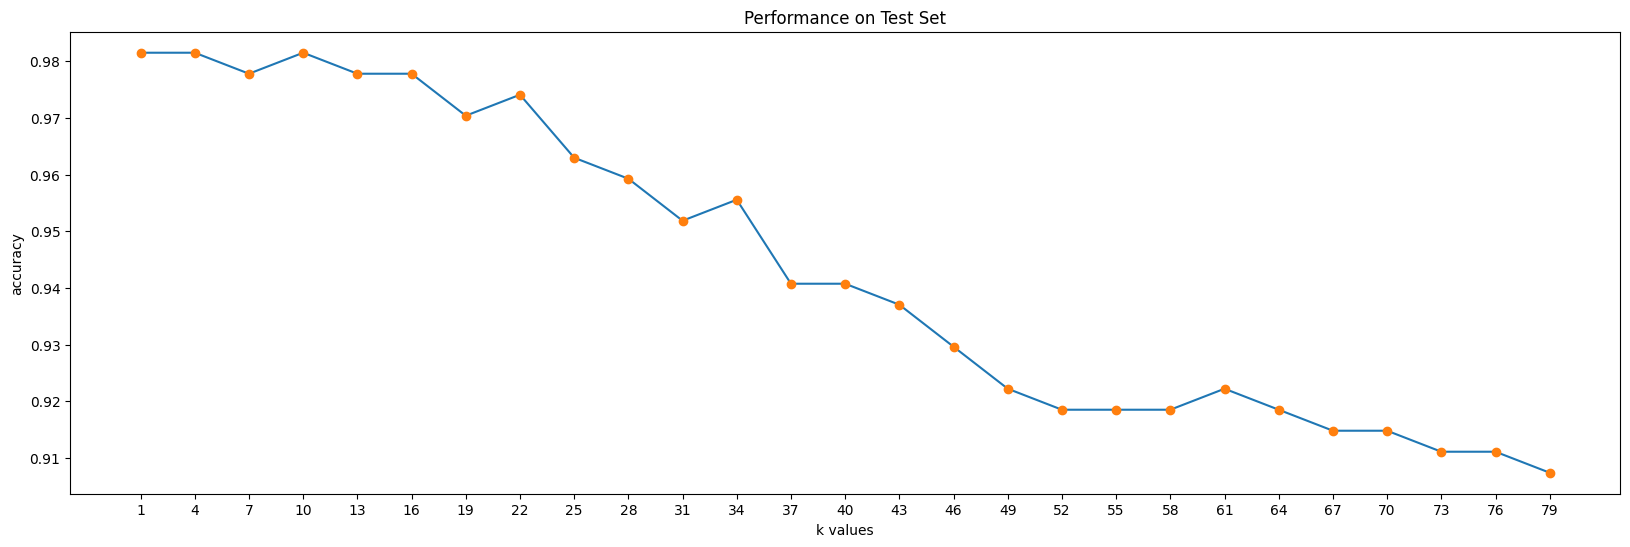

In [44]:
import matplotlib.pyplot as plt
plt.figure(figsize = (20,6))
plt.plot(k_list, performance)
plt.plot(k_list, performance, 'o')
plt.xticks (k_list)
plt.xlabel("k values")
plt.ylabel("accuracy")
plt.title("Performance on Test Set")